In [1]:
from pathlib import Path
import os

from astropy.nddata import CCDData
from astropy.visualization import hist
import ccdproc as ccdp
import matplotlib.pyplot as plt
import numpy as np

from convenience_functions import show_image

from astropy.stats import mad_std

In [9]:
arc=CCDData.read("wc/FCSA00209469.fits")
re_path=Path("result")
wc_path=Path("wc")

INFO: An exception happened while extracting WCS information from the Header.
InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3104 of file cextern/wcslib/C/wcs.c:
Unmatched celestial axes.
 [astropy.nddata.ccddata]


this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set DATE-END to '2019-05-12T14:44:22.309' from MJD-END'. [astropy.wcs.wcs]
  'degree' -> 'deg'. [astropy.wcs.wcs]


In [10]:
pixel1=500
pixel2=3500
col1=5
col2=100
arc_arr=(arc.data).astype('int32')

In [21]:
arc_slice=arc_arr[:,0:100]
pk_col=70
flux=arc_slice[pixel1:pixel2,pk_col]
lpeak=arc_slice[pixel1:pixel2,pk_col]-arc_slice[pixel1-1:pixel2-1,pk_col]
rpeak=arc_slice[pixel1:pixel2,pk_col]-arc_slice[pixel1+1:pixel2+1,pk_col]
peak_tresh=np.mean(flux)+3*np.std(flux)
peak=(lpeak>0) * (rpeak>0)


pk_condi=(peak==True) & (flux>peak_tresh)
cdt_pk_pos=np.argwhere(pk_condi)#candidates peak position
cdt_pk_flux=flux[pk_condi]

num_pk=10
too_close=(cdt_pk_pos[1:]-cdt_pk_pos[:-1])<=2

pk_index=np.argsort(cdt_pk_flux)[::-1][:num_pk]
sort_helper=np.argsort(np.arange(pixel2-pixel1)[pk_condi][pk_index])


peak_pos=cdt_pk_pos[pk_index][sort_helper]
peak_flux=cdt_pk_flux[pk_index][sort_helper]


In [22]:
cdt_pk_pos

array([[ 714],
       [1291],
       [2234],
       [2365],
       [2388],
       [2584],
       [2788],
       [2805],
       [2927]])

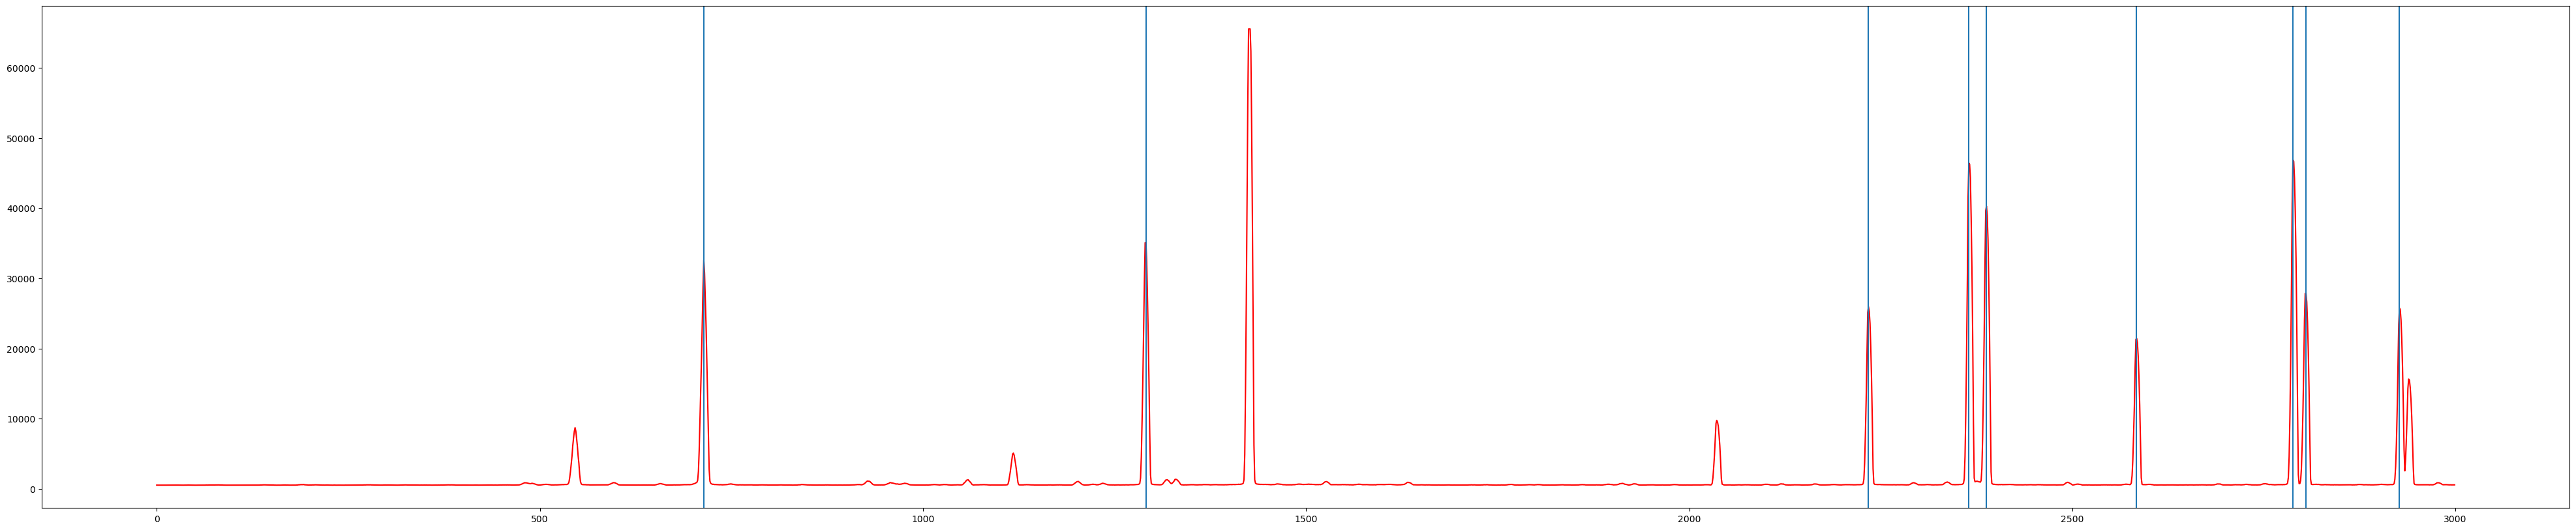

In [23]:
plt.figure(figsize=(50,10))
plt.plot(flux,'r')
for i in range(len(cdt_pk_pos)):
    plt.axvline(cdt_pk_pos[i])

array([6, 5, 4, 3, 2, 1])

In [ ]:
arc_arr.max()

65535

In [ ]:
peak.sum()

851

In [ ]:
(peak==True) #& (flux>peak_tresh)).sum()

array([False, False, False, ..., False,  True, False])

In [ ]:
(flux>peak_tresh).sum()

0